<h1>Code4Life academy recrutation - Iris Dataset

<h2> Basic import, data import, cleaning & data preparing</h2>

Let start with some necessary imports 

In [165]:
import numpy as np # linear algebra, calculations
import pandas as pd #pandas - data processing, data frames, csv import
import seaborn as sns #library with more specialised plots
import matplotlib.pyplot as plt #plotting

from pandas.plotting import andrews_curves, parallel_coordinates, radviz #plots that i'll use in visualization part

In [166]:
import warnings 
warnings.filterwarnings("ignore") #ignoring seaborn & other libraries unneccessary warnings e.g. information about changes in next versions

In [167]:
sns.set(style="dark", color_codes=True) #setting styles of plots

After some imports and config we can start with reading data; take a look into a file:

"Sepal.Length"|"Sepal.Width"|"Petal.Length"|"Petal.Width"|"Species"  
"1"|5.1|3.5|1.4|"0.2"|"setosa"  
"2"|4.9|3|1.4|"0.2"|"setosa"

As we can see, delimiter is "|", not ","; as we can also see - we have a header line in file, so using 
>pd.read_csv

will read it  - or we can use 'header' parameter to define it manually.

In [168]:
data = pd.read_csv('../data/raw/iris_dataset.csv', delimiter="|") #importing dataset into python

In [169]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [170]:
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length
count,150.000000,149.000000,150.000000
mean,5.779333,3.061745,3.758000
std,1.197721,0.433963,1.765298
min,-4.800000,2.000000,1.000000
25%,5.100000,2.800000,1.600000
50%,5.800000,3.000000,4.350000
75%,6.400000,3.300000,5.100000
max,7.900000,4.400000,6.900000


So, before we start working with data - we should work on a copy of data

In [171]:
data_copy = data.copy()
data_copy.columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth',
       'Species']
data_copy.describe()

,SepalLength,SepalWidth,PetalLength
count,150.000000,149.000000,150.000000
mean,5.779333,3.061745,3.758000
std,1.197721,0.433963,1.765298
min,-4.800000,2.000000,1.000000
25%,5.100000,2.800000,1.600000
50%,5.800000,3.000000,4.350000
75%,6.400000,3.300000,5.100000
max,7.900000,4.400000,6.900000


In [172]:
null_columns=data_copy.columns[data_copy.isnull().any()]
data_copy[null_columns].isnull().sum()

SepalWidth    1
dtype: int64

Ooops, as we see there - there is one value missing in Sepal.width - we have to handle it before we can start working with data.  
As we can also see - one column in not included in this summary.

In [173]:
print(data_copy[data_copy.isnull().any(axis=1)][null_columns].head())

    SepalWidth
82         NaN


So at row number 82 we have missing value - let's check it also on file, if there is problem with reading data, or value is really missing - in this case we can handle it, because it's only one value.
>"82"|5.5|NA|3.7|"1"|"versicolor"  

So we have there missing value. Another interesting thing - we have an quotation mark at index and one column - let's check these one column, what was not included in summary of data.

In [174]:
print(data_copy['PetalWidth'].value_counts())

0.2    29
1.3    13
1.8    12
1.5    12
2.3     8
1.4     8
1       7
0.4     7
0.3     7
2       6
2.1     6
0.1     5
1.2     5
1.9     5
1.6     4
2.5     3
2.4     3
1.1     3
2.2     2
1.7     2
2,2     1
0.6     1
0.5     1
Name: PetalWidth, dtype: int64


In [21]:
print(data_copy.dtypes)

SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth      object
Species         object
dtype: object


As we can see, one value has ",", the remaining values have a dot between numbers - let handle it now. And these values are now stored as a string (object type)!

In [22]:
data_copy['PetalWidth'] = data_copy['PetalWidth'].apply(lambda x: x.replace(',','.'))

In [23]:
print(data_copy['PetalWidth'].value_counts())

0.2    29
1.3    13
1.5    12
1.8    12
1.4     8
2.3     8
0.3     7
1       7
0.4     7
2.1     6
2       6
0.1     5
1.2     5
1.9     5
1.6     4
2.5     3
2.4     3
2.2     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: PetalWidth, dtype: int64


We can now convert into float values column

In [24]:
data_copy['PetalWidth'] = data_copy['PetalWidth'].astype(float)
data_copy.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,149.000000,150.000000,150.000000
mean,5.779333,3.061745,3.758000,1.199333
std,1.197721,0.433963,1.765298,0.762238
min,-4.800000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
data_copy.dtypes

SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Species         object
dtype: object

One column less - let's check other, if they do not contain something bad

Looking almost good, but.. values in these columns cannot be below 0! So, we have one 
> -4.8  

value at Sepal.Length column. We should now ask experts/client about it - because we have three options now:
* to remove row (but we have small dataset - but this way will prevent us from distortion of data)
* to replace negative value with abs values (if it fits to other values (probably from their category) - is between min and max of other samples)
* or just use mean value - from whole column - or just from this category

so at this place - we should handle it with one of possible ways. Or maybe we should try every possible solution. We should also try this for missing value Sepal.Width.  
But this time, we will try with two possible solutions:
* one, with dropping row with missing/incorrect values
* second, with using mean value from category for missing/incorrect values

<h3> Handling missing/incorrect values </h3>

In [26]:
test_data_dropped = data_copy.copy()
test_data_dropped = test_data_dropped[test_data_dropped['SepalLength'] > 0]
test_data_dropped= test_data_dropped.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
test_data_dropped.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,148.000000,148.000000,148.000000,148.000000
mean,5.852703,3.059459,3.770946,1.207432
std,0.828690,0.434536,1.770593,0.762746
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.575000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
test_data_mean = data_copy.copy()
test_data_mean = test_data_mean.assign(b = test_data_mean['SepalLength'].where(test_data_mean['SepalLength'].ge(0), np.nan))
test_data_mean['SepalLength'] = test_data_mean['b']
test_data_mean = test_data_mean.drop(columns='b')
test_data_mean = test_data_mean.fillna(test_data_mean.mean())
test_data_mean.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.850336,3.061745,3.758000,1.199333
std,0.823613,0.432504,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
#save this two frames as a separate csv files in /data/processed
test_data_dropped.to_csv("../data/processed/iris_drop_missing.csv", sep=",", index=False)
test_data_mean.to_csv("../data/processed/iris_mean_missing.csv", sep=",", index=False)

We have a preview of data - let's check how many of samples in each specie we have for each frame:

In [29]:
test_data_mean["Species"].value_counts()

versicolor    50
setosa        50
virginica     50
Name: Species, dtype: int64

In [30]:
test_data_dropped["Species"].value_counts()

virginica     50
versicolor    49
setosa        49
Name: Species, dtype: int64

<h2> Data exploring - visualization, getting some knowledge about data </h2>

Let's visualize our data - starting with scatterplot - using test_data_mean dataframe
First, start with Sepal length x width columns

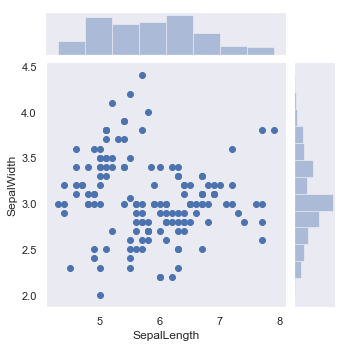

In [31]:
plot = sns.jointplot(x="SepalLength", y="SepalWidth", data=test_data_mean, size=5)
plot.savefig('../reports/figures/scatter_sepal.png')

But from these one - we don't know, to which category belong specified sample

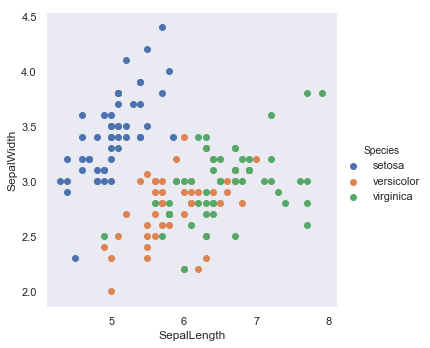

In [32]:
plot = sns.FacetGrid(test_data_mean, hue="Species", size=5).map(plt.scatter, "SepalLength", "SepalWidth").add_legend()
plot.savefig('../reports/figures/scatter_sepal_legend.png')

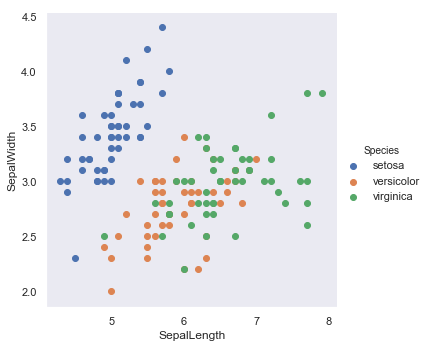

In [178]:
plot = sns.FacetGrid(test_data_dropped, hue="Species", size=5).map(plt.scatter, "SepalLength", "SepalWidth").add_legend()
plot.savefig('../reports/figures/scatter_dropped_sepal_legend.png')

As we see there - there is one outline in setosa, and versicolor and viriginica are mixed - but virginica has bigger values of length than versicolor. Take also a look into petal length and width.

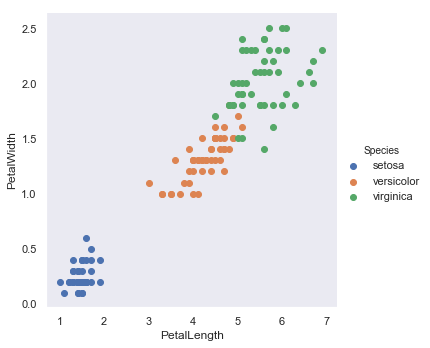

In [33]:
plot = sns.FacetGrid(test_data_mean, hue="Species", size=5).map(plt.scatter, "PetalLength", "PetalWidth").add_legend()
plot.savefig('../reports/figures/scatter_petal_legend.png')

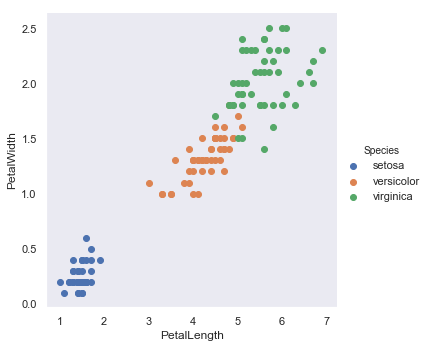

In [179]:
plot = sns.FacetGrid(test_data_dropped, hue="Species", size=5).map(plt.scatter, "PetalLength", "PetalWidth").add_legend()
plot.savefig('../reports/figures/scatter_dropped_petal_legend.png')

This time we see that setosa is isolated, without outlines, and two remaining has area with mixed samples - but we see, that most of them are there more isolated. That plot give us more information about data correlation to specified species. 

Lets look into density of variables

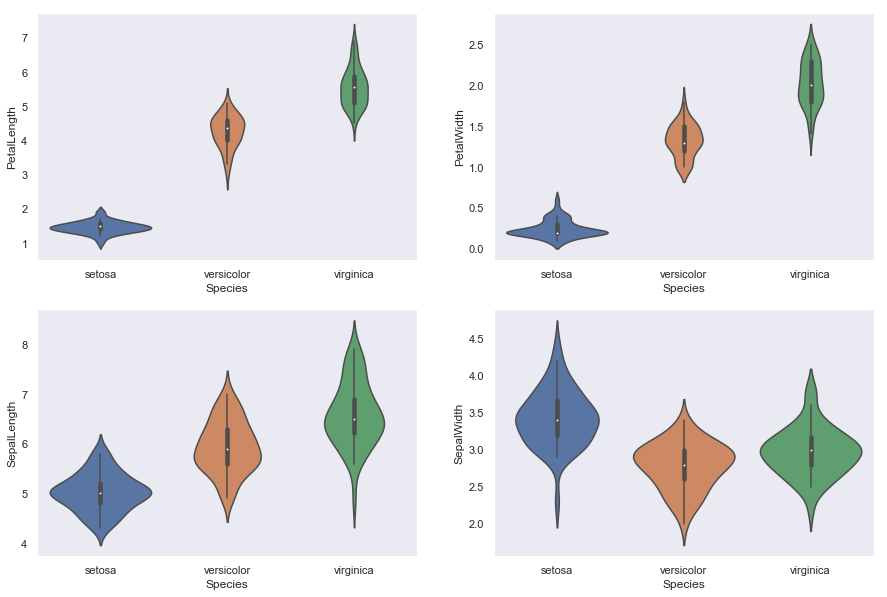

In [175]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLength',data=test_data_mean)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidth',data=test_data_mean)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLength',data=test_data_mean)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidth',data=test_data_mean)
plt.savefig('../reports/figures/violin_mean_all.png')

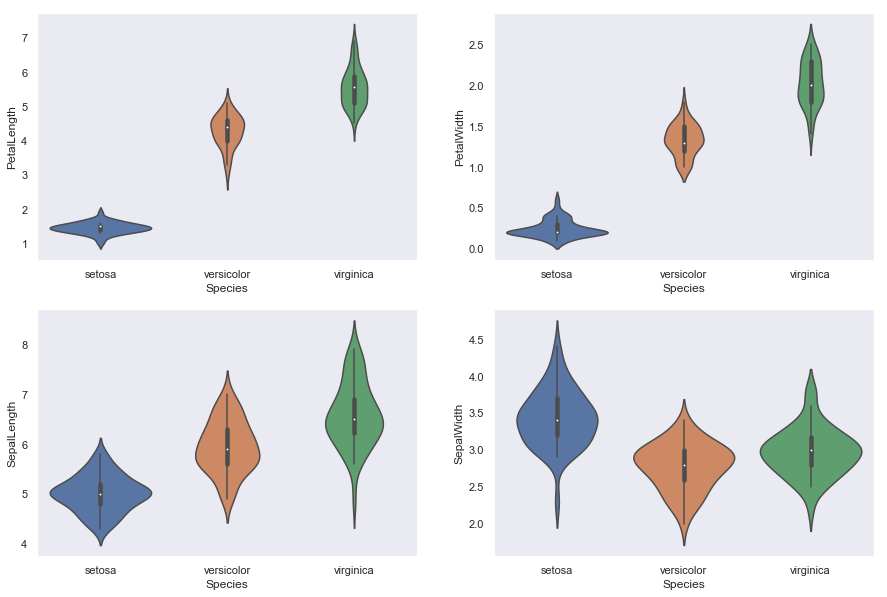

In [177]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLength',data=test_data_dropped)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidth',data=test_data_dropped)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLength',data=test_data_dropped)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidth',data=test_data_dropped)
plt.savefig('../reports/figures/violin_dropped_all.png')

As we can see on previous plot, Petal width & length has great impact on class - their values are totally separeted from each other and in prediction will have significant impact. Problem is with sepal length and width - data overlap in both of them, but their core parts are on another values - but not at width, because versicolor and virignica has core values on same level.

Scatterplot is great, but we have to look deeper and work with our Curse of Dimensionality. More dimenstions - to work with that, we can use Andrews' Curves, where the observation represents the coefficients of a so-called Fourier series. We can also use Parallel Coordinates plot, which shows values of all features in one plot - with using separate columns for each. Last one of this plots is radviz, which plots a N-dimensional data set into a simple 2D space where the influence of each dimension can be interpreted as a balance between the influence of all dimensions.

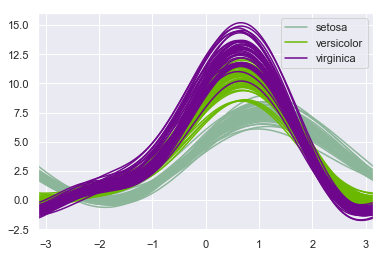

In [35]:
plot = andrews_curves(test_data_mean, "Species")
plot.figure.savefig('../reports/figures/andrew_curves.png')

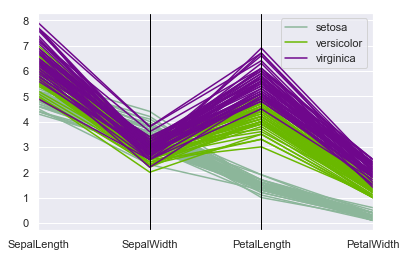

In [36]:
plot = parallel_coordinates(test_data_mean, "Species")
plot.figure.savefig('../reports/figures/parallel_coordinates.png')

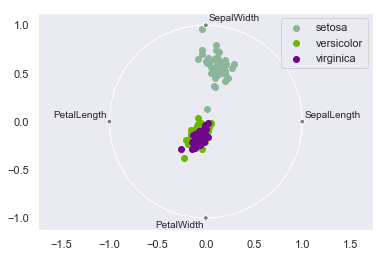

In [183]:
plot = radviz(test_data_mean, "Species")
plot.figure.savefig('../reports/figures/radviz.png')

After analyse of radviz plot - we see that there can be classification error with versicolor and virginica samples.

Let's take a look into second data frame - with dropping missing/incomplete rows. I will focus on two most giving information graphs - radviz and parallel.

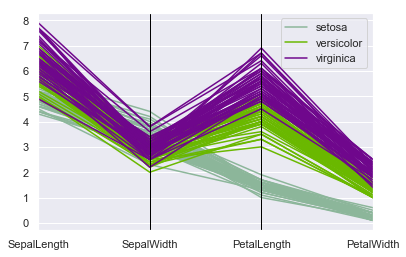

In [181]:
plot = parallel_coordinates(test_data_dropped, "Species")
plot.figure.savefig('../reports/figures/parallel_coordinates_dropped.png')

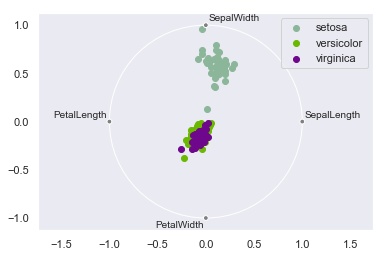

In [182]:
plot = radviz(test_data_dropped, "Species")
plot.figure.savefig('../reports/figures/radviz_dropped.png')

... and dropping these two rows do not change plots so much - but we should go further and analyse correlation between attributes and target feature

<h3> Pearson correlation check </h3>

In [40]:
test_data_dropped.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.117009,0.871145,0.815815
SepalWidth,-0.117009,1.000000,-0.429040,-0.367709
PetalLength,0.871145,-0.429040,1.000000,0.962910
PetalWidth,0.815815,-0.367709,0.962910,1.000000


In [41]:
test_data_mean.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.116711,0.867459,0.811142
SepalWidth,-0.116711,1.000000,-0.432108,-0.371657
PetalLength,0.867459,-0.432108,1.000000,0.962865
PetalWidth,0.811142,-0.371657,0.962865,1.000000


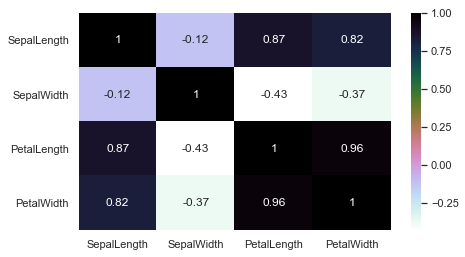

In [42]:
plt.figure(figsize=(7,4)) 
plot = sns.heatmap(test_data_dropped.corr(),annot=True,cmap='cubehelix_r')
plot.figure.savefig('../reports/figures/heatmap_corr_dropped.png')

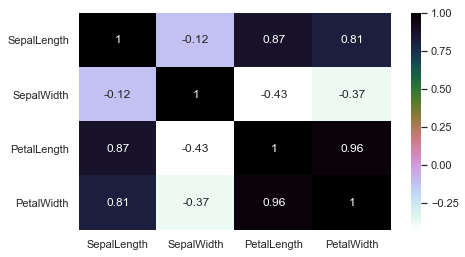

In [43]:
plt.figure(figsize=(7,4)) 
plot = sns.heatmap(test_data_mean.corr(),annot=True,cmap='cubehelix_r')
plot.figure.savefig('../reports/figures/heatmap_corr_mean.png')

After looking at heatmap - diffrence between two methods are really small only correlation between petal width and sepal length changed.  
The SepalWidth and SepalLength has realy low correlation/no correlation.  
The PetalWidth and PetalLength are highly correlated  

But first - lets check values of correlation of each feature to target feature. To do that, we have to encode category - or use one-way anova test.

<h3> Checking correlation between features and target </h3>

<h4> Using statistic tests </h4>

In [44]:
import scipy.stats as stats #library with scientific methods - also with statistics tests
from statsmodels.formula.api import ols #statistic tests library

In [45]:
test_data_mean.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

In [46]:
stats.f_oneway(test_data_mean['PetalLength'][test_data_mean['Species'] == 'setosa'], 
             test_data_mean['PetalLength'][test_data_mean['Species'] == 'versicolor'],
             test_data_mean['PetalLength'][test_data_mean['Species'] == 'virginica'])

F_onewayResult(statistic=1180.161182252981, pvalue=2.8567766109615584e-91)

In [47]:
results = ols('PetalLength ~ C(Species)', data=test_data_mean).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PetalLength   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     1180.
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           2.86e-91
Time:                        15:44:57   Log-Likelihood:                -84.847
No. Observations:                 150   AIC:                             175.7
Df Residuals:                     147   BIC:                             184.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.4620      0.061     24.023      0.000       1.342       1.582
C(Species)[T.versicolor]     2.7980      0.086     32.510      0.000       2.628       2.968
C(Species)[T.virginica]      4.0900      0.086     47.521      0.000       3.920       4.260
==============================================================================
Omnibus:                        4.394   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                5.366
Skew:                           0.122   Prob(JB):                       0.0683
Kurtosis:                       3.894   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

let's interprate tests - we got this values:
* p-value: 2.86e-91
* f-stat: 1180

so we can interprate this value as a high correlation. Continue with other features.

In [48]:
stats.f_oneway(test_data_mean['PetalWidth'][test_data_mean['Species'] == 'setosa'], 
             test_data_mean['PetalWidth'][test_data_mean['Species'] == 'versicolor'],
             test_data_mean['PetalWidth'][test_data_mean['Species'] == 'virginica'])

F_onewayResult(statistic=960.007146801809, pvalue=4.169445839443116e-85)

In [49]:
stats.f_oneway(test_data_mean['SepalLength'][test_data_mean['Species'] == 'setosa'], 
             test_data_mean['SepalLength'][test_data_mean['Species'] == 'versicolor'],
             test_data_mean['SepalLength'][test_data_mean['Species'] == 'virginica'])

F_onewayResult(statistic=114.07485381664135, pvalue=1.241038052658806e-30)

In [50]:
stats.f_oneway(test_data_mean['SepalWidth'][test_data_mean['Species'] == 'setosa'], 
             test_data_mean['SepalWidth'][test_data_mean['Species'] == 'versicolor'],
             test_data_mean['SepalWidth'][test_data_mean['Species'] == 'virginica'])

F_onewayResult(statistic=47.70777835913615, pvalue=1.0780237566238808e-16)

What we can see there? As we see there, some of values are more, some are less significant for target feature - but as we can see, every has some impact. I want also to know the pearson correlation between them - in that case, i have to encode categorical values as numbers.

<h4> Using category encoding </h4>

In [51]:
from sklearn import preprocessing #preprocessing from sklearn - to have acces to LabelEncoder.

In [52]:
le = preprocessing.LabelEncoder()
le.fit(data_copy['Species'])
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [53]:
test_data_mean['SpeciesEncoded'] = le.transform(test_data_mean['Species'])
test_data_mean['SpeciesEncoded'].unique()

array([0, 1, 2], dtype=int64)

In [54]:
test_data_mean.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth,SpeciesEncoded
SepalLength,1.000000,-0.116711,0.867459,0.811142,0.776345
SepalWidth,-0.116711,1.000000,-0.432108,-0.371657,-0.429974
PetalLength,0.867459,-0.432108,1.000000,0.962865,0.949035
PetalWidth,0.811142,-0.371657,0.962865,1.000000,0.956547
SpeciesEncoded,0.776345,-0.429974,0.949035,0.956547,1.000000


Let's do it also for second frame

In [114]:
test_data_dropped['SpeciesEncoded'] = le.transform(test_data_dropped['Species'])
test_data_dropped['SpeciesEncoded'].unique()

array([0, 1, 2], dtype=int64)

In [56]:
test_data_dropped.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth,SpeciesEncoded
SepalLength,1.000000,-0.117009,0.871145,0.815815,0.780736
SepalWidth,-0.117009,1.000000,-0.429040,-0.367709,-0.426554
PetalLength,0.871145,-0.429040,1.000000,0.962910,0.948684
PetalWidth,0.815815,-0.367709,0.962910,1.000000,0.956323
SpeciesEncoded,0.780736,-0.426554,0.948684,0.956323,1.000000


As we see there, we have some differences - but as we can see, using mean  instead of dropping we have higher correlation between SepalLength and Species, like also for SepalWidth. For next steps we should experiment with using features - should we use all features to build model, or use only these with higher correlation?

<h2> Models preparation </h2>

In [180]:
#we should now drop these additional columns
if 'SpeciesEncoded' in test_data_dropped.columns:
    test_data_dropped = test_data_dropped.drop(columns=['SpeciesEncoded'])
if 'SpeciesEncoded' in test_data_mean.columns:
    test_data_mean = test_data_mean.drop(columns=['SpeciesEncoded'])

After exploring and clearing it's time to start working on a model(s)

In [58]:
from sklearn.model_selection import train_test_split #splitting data set into training and test data
from sklearn import metrics #metrics - to measure quality of model

In [59]:
from sklearn.neighbors import KNeighborsClassifier   #KNN model
from sklearn.svm import SVC #SVM model
from sklearn.tree import DecisionTreeClassifier #DecisionTree model

After importing most important elements for now, we should split our datasets(frames) to train part (70% of data) and test data (30% of data)

In [238]:
seed = 7 #if we want to reproduce same data each time - use random state seed

In [239]:
train_dropped, test_dropped = train_test_split(test_data_dropped, test_size = 0.3, random_state=seed)

In [240]:
train_dropped.shape

(103, 5)

In [241]:
test_dropped.shape #looking fine

(45, 5)

In [242]:
train_mean, test_mean  = train_test_split(test_data_mean, test_size = 0.3, random_state=seed)

In [243]:
train_mean.shape

(105, 5)

In [244]:
test_mean.shape #also looking fine

(45, 5)

<h3> Model building using all features </h3>

Now - split it into feature and target feature both for test and training

In [245]:
data_features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

In [246]:
train_dropped_X = train_dropped[data_features] # taking the training data features
train_dropped_y=train_dropped.Species # output of our training data
test_dropped_X= test_dropped[data_features] # taking test data features
test_dropped_y =test_dropped.Species   #output value of test data

In [247]:
train_mean_X = train_mean[data_features] # taking the training data features
train_mean_y=train_mean.Species # output of our training data
test_mean_X= test_mean[data_features] # taking test data features
test_mean_y =test_mean.Species   #output value of test data

In [203]:
import pickle #good practice is to save your models - let's save each model
import datetime

In [204]:
#function to save model
default_path = '../models/'
def save_model(file_name, model):
    file_name = default_path + file_name + '.sav'
    pickle.dump(model, open(file_name, 'wb'))

def metrics_print(prediction, test_y):
    print('The accuracy is',metrics.accuracy_score(prediction,test_y))
    print('The precision is',metrics.precision_score(prediction,test_y, average='micro')) 
    #averaege value: normally it's binary mode, but we have more than one class, so we have to use average=None - will return the precision scores for each class, 
    # or average=micro to return the total ratio of tp/(tp + fp)
    print('The recall is',metrics.recall_score(prediction,test_y, average='micro'))
    #The F1 score can be interpreted as a weighted average of the precision and recall, 
    #where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.
    print('The F-score is', metrics.f1_score(prediction, test_y, average='micro'))

<h4>1. Model: KNN; DataFrame: test_dropped </h4>

In [139]:
def knn(train_X, train_y, test_X, test_y, n_number = 3, data_set=""):
    model=KNeighborsClassifier(n_neighbors=n_number)
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    metrics_print(prediction, test_y)
    save_model(str(data_set) + '_knn_N-' + str(n_number) 
               + '_F1-' + str(round(metrics.f1_score(prediction, test_y, average='micro'), 3)).replace(".", ",") 
               + '_Acc-' + str(round(metrics.accuracy_score(prediction,test_y),3)).replace(".", ","), model)

In [190]:
#3 neighbors
knn(train_dropped_X, train_dropped_y, test_dropped_X, test_dropped_y, 3)

The accuracy is 0.9555555555555556
The precision is 0.9555555555555556
The recall is 0.9555555555555556
The F-score is 0.9555555555555556


In [191]:
#5 neighbors
knn(train_dropped_X, train_dropped_y, test_dropped_X, test_dropped_y, 5)

The accuracy is 0.9555555555555556
The precision is 0.9555555555555556
The recall is 0.9555555555555556
The F-score is 0.9555555555555556


In [192]:
#7 neighbors
knn(train_dropped_X, train_dropped_y, test_dropped_X, test_dropped_y, 7)

The accuracy is 0.9333333333333333
The precision is 0.9333333333333333
The recall is 0.9333333333333333
The F-score is 0.9333333333333333


In [193]:
#11 neighbors
knn(train_dropped_X, train_dropped_y, test_dropped_X, test_dropped_y, 11)

The accuracy is 0.9777777777777777
The precision is 0.9777777777777777
The recall is 0.9777777777777777
The F-score is 0.9777777777777777


As we can see, changing the number of neigbors parameter can change score - starting with 0.955 to 1.0 accuracy. But that only accuracy - we should take a look also into additional parameters of model - precision, recall.  
* precision is intuitively the ability of the classifier not to label as positive a sample that is negative.  
* recall is intuitively the ability of the classifier to find all the positive samples.

After looking into these two additional - we see, that for one class there are always score=1 in recall and precision, for other - it depends on number of neigbours.

<h4>2. Model: SVM; DataFrame: test_dropped </h4>

In [205]:
def svm(train_X, train_y, test_X, test_y, kernel='rbf', data_set=""):
    model = SVC(kernel=kernel)
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    metrics_print(prediction, test_y)
    save_model(str(data_set) + '_svm_Kernel-' + kernel
               + '_F1-' + str(round(metrics.f1_score(prediction, test_y, average='micro'), 3)).replace(".", ",") 
               + '_Acc-' + str(round(metrics.accuracy_score(prediction,test_y),3)).replace(".", ","), model)

In [206]:
#svm as a parameter takes kernel type
#It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
svm(train_dropped_X, train_dropped_y, test_dropped_X, test_dropped_y, 'rbf')

The accuracy is 0.9777777777777777
The precision is 0.9777777777777777
The recall is 0.9777777777777777
The F-score is 0.9777777777777777


In [207]:
svm(train_dropped_X, train_dropped_y, test_dropped_X, test_dropped_y, 'linear')

The accuracy is 1.0
The precision is 1.0
The recall is 1.0
The F-score is 1.0


In [208]:
svm(train_dropped_X, train_dropped_y, test_dropped_X, test_dropped_y, 'poly')

The accuracy is 0.9777777777777777
The precision is 0.9777777777777777
The recall is 0.9777777777777777
The F-score is 0.9777777777777777


In [209]:
svm(train_dropped_X, train_dropped_y, test_dropped_X, test_dropped_y, 'sigmoid')

The accuracy is 0.26666666666666666
The precision is 0.26666666666666666
The recall is 0.26666666666666666
The F-score is 0.26666666666666666


<h4>3. Model: DecisionTree; DataFrame: test_dropped </h4>

In [222]:
def decision_tree(train_X, train_y, test_X, test_y, max_depth = None, min_samples_leaf = 1, data_set=""):
    model = DecisionTreeClassifier(random_state=seed, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    metrics_print(prediction, test_y)
    save_model(str(data_set) + '_dt_Depth-' + str(max_depth) + '_minSampleLeaf-' + str(min_samples_leaf)
               + '_F1-' + str(round(metrics.f1_score(prediction, test_y, average='micro'), 3)).replace(".", ",") 
              + '_Acc-' + str(round(metrics.accuracy_score(prediction,test_y),3)).replace(".", ","), model)

In [223]:
decision_tree(train_dropped_X, train_dropped_y, test_dropped_X, test_dropped_y)

The accuracy is 0.9777777777777777
The precision is 0.9777777777777777
The recall is 0.9777777777777777
The F-score is 0.9777777777777777


In [224]:
decision_tree(train_dropped_X, train_dropped_y, test_dropped_X, test_dropped_y, 2) #worse

The accuracy is 0.9555555555555556
The precision is 0.9555555555555556
The recall is 0.9555555555555556
The F-score is 0.9555555555555556


In [225]:
decision_tree(train_dropped_X, train_dropped_y, test_dropped_X, test_dropped_y, 3) #same as first

The accuracy is 0.9777777777777777
The precision is 0.9777777777777777
The recall is 0.9777777777777777
The F-score is 0.9777777777777777


In [226]:
decision_tree(train_dropped_X, train_dropped_y, test_dropped_X, test_dropped_y, 4)

The accuracy is 0.9777777777777777
The precision is 0.9777777777777777
The recall is 0.9777777777777777
The F-score is 0.9777777777777777


In [227]:
#time to add new parameter value, using previous best
decision_tree(train_dropped_X, train_dropped_y, test_dropped_X, test_dropped_y, 3, 2) 

The accuracy is 0.9777777777777777
The precision is 0.9777777777777777
The recall is 0.9777777777777777
The F-score is 0.9777777777777777


In [228]:
decision_tree(train_dropped_X, train_dropped_y, test_dropped_X, test_dropped_y, 3, 3)

The accuracy is 0.9777777777777777
The precision is 0.9777777777777777
The recall is 0.9777777777777777
The F-score is 0.9777777777777777


In [229]:
decision_tree(train_dropped_X, train_dropped_y, test_dropped_X, test_dropped_y, 3, 4)

The accuracy is 0.9777777777777777
The precision is 0.9777777777777777
The recall is 0.9777777777777777
The F-score is 0.9777777777777777


<h4>4. Model: KNN; DataFrame: test_mean </h4>

In [211]:
#3 neighbors
knn(train_mean_X, train_mean_y, test_mean_X, test_mean_y, 3, "mean")

The accuracy is 0.9333333333333333
The precision is 0.9333333333333333
The recall is 0.9333333333333333
The F-score is 0.9333333333333333


In [212]:
#5 neighbors
knn(train_mean_X, train_mean_y, test_mean_X, test_mean_y, 5, "mean")

The accuracy is 0.9111111111111111
The precision is 0.9111111111111111
The recall is 0.9111111111111111
The F-score is 0.9111111111111111


In [213]:
#7 neighbors
knn(train_mean_X, train_mean_y, test_mean_X, test_mean_y, 7, "mean")

The accuracy is 0.9333333333333333
The precision is 0.9333333333333333
The recall is 0.9333333333333333
The F-score is 0.9333333333333333


In [214]:
#11 neighbors
knn(train_mean_X, train_mean_y, test_mean_X, test_mean_y, 11, "mean")

The accuracy is 0.9111111111111111
The precision is 0.9111111111111111
The recall is 0.9111111111111111
The F-score is 0.9111111111111111


In [327]:
#13 neighbors
knn(train_mean_X, train_mean_y, test_mean_X, test_mean_y, 13, "mean")

The accuracy is 0.9333333333333333
The precision is [1.         0.88888889 0.91666667]
The recall is [1.         0.94117647 0.84615385]
The F-score is [1.         0.91428571 0.88      ]


In [328]:
#17 neighbors
knn(train_mean_X, train_mean_y, test_mean_X, test_mean_y, 17, "mean")

The accuracy is 0.9333333333333333
The precision is [1.         0.88888889 0.91666667]
The recall is [1.         0.94117647 0.84615385]
The F-score is [1.         0.91428571 0.88      ]


In [329]:
#21 neighbors
knn(train_mean_X, train_mean_y, test_mean_X, test_mean_y, 21, "mean")

The accuracy is 0.9333333333333333
The precision is [1.         0.88888889 0.91666667]
The recall is [1.         0.94117647 0.84615385]
The F-score is [1.         0.91428571 0.88      ]


In [330]:
#23 neighbors
knn(train_mean_X, train_mean_y, test_mean_X, test_mean_y, 23, "mean")

The accuracy is 0.9333333333333333
The precision is [1.         0.88888889 0.91666667]
The recall is [1.         0.94117647 0.84615385]
The F-score is [1.         0.91428571 0.88      ]


In [331]:
#29 neighbors
knn(train_mean_X, train_mean_y, test_mean_X, test_mean_y, 29, "mean")

The accuracy is 0.9333333333333333
The precision is [1.         0.88888889 0.91666667]
The recall is [1.         0.94117647 0.84615385]
The F-score is [1.         0.91428571 0.88      ]


In [332]:
#51 neighbors
knn(train_mean_X, train_mean_y, test_mean_X, test_mean_y, 51, "mean")

The accuracy is 0.9333333333333333
The precision is [1.         0.88888889 0.91666667]
The recall is [0.9375     0.94117647 0.91666667]
The F-score is [0.96774194 0.91428571 0.91666667]


<h4>5. Model: SVM; DataFrame: test_mean </h4>

In [215]:
#It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
svm(train_mean_X, train_mean_y, test_mean_X, test_mean_y, 'rbf', "mean")

The accuracy is 0.9555555555555556
The precision is 0.9555555555555556
The recall is 0.9555555555555556
The F-score is 0.9555555555555556


In [216]:
svm(train_mean_X, train_mean_y, test_mean_X, test_mean_y, 'linear', "mean")

The accuracy is 0.9333333333333333
The precision is 0.9333333333333333
The recall is 0.9333333333333333
The F-score is 0.9333333333333333


In [217]:
svm(train_mean_X, train_mean_y, test_mean_X, test_mean_y, 'poly', "mean")

The accuracy is 0.8888888888888888
The precision is 0.8888888888888888
The recall is 0.8888888888888888
The F-score is 0.8888888888888888


In [218]:
svm(train_mean_X, train_mean_y, test_mean_X, test_mean_y, 'sigmoid', "mean") #same effect as on first data frame

The accuracy is 0.26666666666666666
The precision is 0.26666666666666666
The recall is 0.26666666666666666
The F-score is 0.26666666666666666


<h4>6. Model: DecisionTree; DataFrame: test_mean </h4>

In [248]:
decision_tree(train_mean_X, train_mean_y, test_mean_X, test_mean_y, data_set="mean")

The accuracy is 0.9111111111111111
The precision is 0.9111111111111111
The recall is 0.9111111111111111
The F-score is 0.9111111111111111


In [249]:
decision_tree(train_mean_X, train_mean_y, test_mean_X, test_mean_y, 2, data_set="mean")

The accuracy is 0.8888888888888888
The precision is 0.8888888888888888
The recall is 0.8888888888888888
The F-score is 0.8888888888888888


In [250]:
decision_tree(train_mean_X, train_mean_y, test_mean_X, test_mean_y, 3, data_set="mean")

The accuracy is 0.8888888888888888
The precision is 0.8888888888888888
The recall is 0.8888888888888888
The F-score is 0.8888888888888888


In [251]:
decision_tree(train_mean_X, train_mean_y, test_mean_X, test_mean_y, 4, data_set="mean")

The accuracy is 0.8666666666666667
The precision is 0.8666666666666667
The recall is 0.8666666666666667
The F-score is 0.8666666666666667


In [252]:
decision_tree(train_mean_X, train_mean_y, test_mean_X, test_mean_y, 3, 2, data_set="mean")

The accuracy is 0.8888888888888888
The precision is 0.8888888888888888
The recall is 0.8888888888888888
The F-score is 0.8888888888888888


In [253]:
decision_tree(train_mean_X, train_mean_y, test_mean_X, test_mean_y, 3, 3, data_set="mean")

The accuracy is 0.8888888888888888
The precision is 0.8888888888888888
The recall is 0.8888888888888888
The F-score is 0.8888888888888888


In [236]:
decision_tree(train_mean_X, train_mean_y, test_mean_X, test_mean_y, 3, 4, data_set="mean")

The accuracy is 0.8888888888888888
The precision is 0.8888888888888888
The recall is 0.8888888888888888
The F-score is 0.8888888888888888


In [237]:
decision_tree(train_mean_X, train_mean_y, test_mean_X, test_mean_y, 2, 2, data_set="mean")

The accuracy is 0.8888888888888888
The precision is 0.8888888888888888
The recall is 0.8888888888888888
The F-score is 0.8888888888888888


<h3>Model building using selected features: Sepal width & length </h3>

Lets check if using only variables with lower correlation to Species and to each other give us some conclusions. We will use only basic tests, without paramter tunning (using only the best from all features), just to compare using all, sepals only and petals only. We will use both sets for that task.

In [393]:
sepal_data_features = ['SepalLength', 'SepalWidth']

In [394]:
sepal_train_dropped_X = train_dropped[sepal_data_features] # taking the training data features
sepal_train_dropped_y=train_dropped.Species # output of our training data
sepal_test_dropped_X= test_dropped[sepal_data_features] # taking test data features
sepal_test_dropped_y =test_dropped.Species   #output value of test data

In [395]:
sepal_train_mean_X = train_mean[sepal_data_features] # taking the training data features
sepal_train_mean_y=train_mean.Species # output of our training data
sepal_test_mean_X= test_mean[sepal_data_features] # taking test data features
sepal_test_mean_y =test_mean.Species   #output value of test data

<h4>KNN</h4>

In [396]:
print("Dataset: dropped missing, sepal only features")
knn(sepal_train_dropped_X, sepal_train_dropped_y, sepal_test_dropped_X, sepal_test_dropped_y, 7, data_set= "sepal_drop")

Dataset: dropped missing, sepal only features
The accuracy is 0.7555555555555555
The precision is [0.91666667 0.6875     0.70588235]
The recall is [1.         0.64705882 0.70588235]
The F-score is [0.95652174 0.66666667 0.70588235]


In [397]:
print("Dataset: mean value for missing, sepal only features")
knn(sepal_train_mean_X, sepal_train_mean_y, sepal_test_mean_X, sepal_test_mean_y, 7, data_set= "sepal_mean")

Dataset: mean value for missing, sepal only features
The accuracy is 0.7777777777777778
The precision is [0.91666667 0.8125     0.64705882]
The recall is [1.         0.65       0.78571429]
The F-score is [0.95652174 0.72222222 0.70967742]


<h4>SVM</h4>

In [398]:
print("Dataset: dropped missing, sepal only features")
svm(sepal_train_dropped_X, sepal_train_dropped_y, sepal_test_dropped_X, sepal_test_dropped_y, data_set= "sepal_drop")

Dataset: dropped missing, sepal only features
The accuracy is 0.8
The precision is [0.91666667 0.75       0.76470588]
The recall is [1.         0.70588235 0.76470588]
The F-score is [0.95652174 0.72727273 0.76470588]


In [399]:
print("Dataset: mean value for missing, sepal only features")
svm(sepal_train_mean_X, sepal_train_mean_y, sepal_test_mean_X, sepal_test_mean_y, data_set= "sepal_mean")

Dataset: mean value for missing, sepal only features
The accuracy is 0.7111111111111111
The precision is [0.91666667 0.625      0.64705882]
The recall is [1.         0.58823529 0.64705882]
The F-score is [0.95652174 0.60606061 0.64705882]


<h4>Decision tree</h4>

In [400]:
print("Dataset: dropped missing, sepal only features")
decision_tree(sepal_train_dropped_X, sepal_train_dropped_y, sepal_test_dropped_X, sepal_test_dropped_y, data_set= "sepal_drop")

Dataset: dropped missing, sepal only features
The accuracy is 0.6444444444444445
The precision is [0.91666667 0.5625     0.52941176]
The recall is [0.91666667 0.5        0.6       ]
The F-score is [0.91666667 0.52941176 0.5625    ]


In [401]:
print("Dataset: mean value for missing, sepal only features")
decision_tree(sepal_train_mean_X, sepal_train_mean_y, sepal_test_mean_X, sepal_test_mean_y, data_set= "sepal_mean")

Dataset: mean value for missing, sepal only features
The accuracy is 0.6222222222222222
The precision is [0.91666667 0.4375     0.58823529]
The recall is [0.84615385 0.46666667 0.58823529]
The F-score is [0.88       0.4516129  0.58823529]


<h3>Model building using selected features: Petal width & length </h3>

In [402]:
petal_data_features = ['PetalLength', 'PetalWidth']

In [403]:
petal_train_dropped_X = train_dropped[petal_data_features] # taking the training data features
petal_train_dropped_y=train_dropped.Species # output of our training data
petal_test_dropped_X= test_dropped[petal_data_features] # taking test data features
petal_test_dropped_y =test_dropped.Species   #output value of test data

In [404]:
petal_train_mean_X = train_mean[petal_data_features] # taking the training data features
petal_train_mean_y=train_mean.Species # output of our training data
petal_test_mean_X= test_mean[petal_data_features] # taking test data features
petal_test_mean_y =test_mean.Species   #output value of test data

<h4>KNN</h4>

In [405]:
print("Dataset: dropped missing, petal only features")
knn(petal_train_dropped_X, petal_train_dropped_y, petal_test_dropped_X, petal_test_dropped_y, 7, data_set= "petal_drop")

Dataset: dropped missing, petal only features
The accuracy is 0.9777777777777777
The precision is [1.     0.9375 1.    ]
The recall is [1.         1.         0.94444444]
The F-score is [1.         0.96774194 0.97142857]


In [409]:
print("Dataset: mean value for missing, petal only features")
knn(petal_train_mean_X, petal_train_mean_y, petal_test_mean_X, petal_test_mean_y, 7, data_set= "petal_mean")

Dataset: mean value for missing, petal only features
The accuracy is 0.9111111111111111
The precision is [1.         0.875      0.88235294]
The recall is [1.         0.875      0.88235294]
The F-score is [1.         0.875      0.88235294]


<h4>SVM</h4>

In [407]:
print("Dataset: dropped missing, petal only features")
svm(petal_train_dropped_X, petal_train_dropped_y, petal_test_dropped_X, petal_test_dropped_y, data_set= "petal_drop")

Dataset: dropped missing, petal only features
The accuracy is 0.9777777777777777
The precision is [1.     0.9375 1.    ]
The recall is [1.         1.         0.94444444]
The F-score is [1.         0.96774194 0.97142857]


In [410]:
print("Dataset: mean value for missing, petal only features")
svm(petal_train_mean_X, petal_train_mean_y, petal_test_mean_X, petal_test_mean_y, data_set= "petal_mean")

Dataset: mean value for missing, petal only features
The accuracy is 0.9333333333333333
The precision is [1.         0.875      0.94117647]
The recall is [1.         0.93333333 0.88888889]
The F-score is [1.         0.90322581 0.91428571]


<h4>Decision tree</h4>

In [411]:
print("Dataset: dropped missing, petal only features")
decision_tree(petal_train_dropped_X, petal_train_dropped_y, petal_test_dropped_X, petal_test_dropped_y, data_set= "petal_drop")

Dataset: dropped missing, petal only features
The accuracy is 0.9777777777777777
The precision is [1.     0.9375 1.    ]
The recall is [1.         1.         0.94444444]
The F-score is [1.         0.96774194 0.97142857]


In [412]:
print("Dataset: mean value for missing, petal only features")
decision_tree(petal_train_mean_X, petal_train_mean_y, petal_test_mean_X, petal_test_mean_y, data_set= "petal_mean")

Dataset: mean value for missing, petal only features
The accuracy is 0.8888888888888888
The precision is [1.         0.875      0.82352941]
The recall is [1.         0.82352941 0.875     ]
The F-score is [1.         0.84848485 0.84848485]


<h3>Models conclusions</h3>

All features conslusions:
* Best accuracy we've scorred using svn with right parameter,
* as we can see in precision and recall lists - first class has better recall and precision score than two others

Using less features:  
* We have results as we expected - this is confirmation of correlation

General conlusions:
* dropping rows with missing/incorrect data give us better score than using global mean values to fill empty cells
* probably we should investigate these missing samples - what data they contains, if they are some kind of outlines

<h3>Let's investigate samples with missing data - after conclusion visualization of incomplete samples</h3>

In [96]:
conclusion_set = data_copy.copy()
conclusion_set['SepalLength'] = conclusion_set['SepalLength'].where( conclusion_set['SepalLength'] > 0, np.nan)
conclusion_set.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [97]:
null_columns=conclusion_set.columns[conclusion_set.isnull().any()]
print(conclusion_set[conclusion_set.isnull().any(axis=1)].head())

    SepalLength  SepalWidth  PetalLength  PetalWidth     Species
25          NaN         3.4          1.9         0.2      setosa
82          5.5         NaN          3.7         1.0  versicolor


In [98]:
#dfz['C'] = np.where(dfz['E'].isnull(), dfz['E'], dfz['C'])
#conclusion_set['Species'] = conclusion_set['Species'].where(conclusion_set.isnull(), "missing")
#dfz.loc[dfz['E'].isnull(), 'C'] = dfz['E']
conclusion_set.loc[25, 'Species'] = 'missed_setosa'
conclusion_set.loc[82, 'Species'] = 'missed_versicolor'

In [99]:
null_columns=conclusion_set.columns[conclusion_set.isnull().any()]
print(conclusion_set[conclusion_set.isnull().any(axis=1)].head())

    SepalLength  SepalWidth  PetalLength  PetalWidth            Species
25          NaN         3.4          1.9         0.2      missed_setosa
82          5.5         NaN          3.7         1.0  missed_versicolor


In [100]:
conclusion_set.SepalLength = conclusion_set.SepalLength.fillna(conclusion_set.SepalLength.mean())
conclusion_set.SepalWidth = conclusion_set.SepalWidth.fillna(conclusion_set.SepalWidth.mean())

In [101]:
conclusion_set.Species.unique()

array(['setosa', 'missed_setosa', 'versicolor', 'missed_versicolor',
       'virginica'], dtype=object)

In [102]:
null_columns=conclusion_set.columns[conclusion_set.isnull().any()]
print(conclusion_set[conclusion_set.isnull().any(axis=1)].head())

Empty DataFrame
Columns: [SepalLength, SepalWidth, PetalLength, PetalWidth, Species]
Index: []


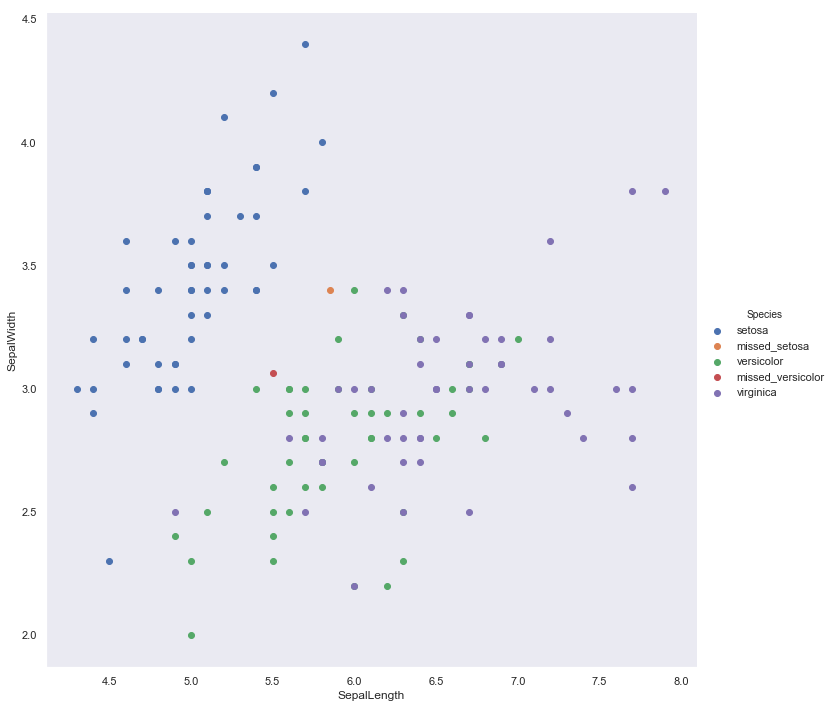

In [103]:
plot = sns.FacetGrid(conclusion_set, hue="Species", size=10).map(plt.scatter, "SepalLength", "SepalWidth").add_legend()
plot.savefig('../reports/figures/scatter_missing.png')

We have here two samples with missing values - now these NaN values are filled with mean value of all of samples in that column. 
We have one missed_setosa and as we can see, this one, with this value, is an outline for rest of data from this type. 
Second missing is missed versicolor sample and as we can see on a plot, it's not a outline - but SepalWidth value of this sample is significant bigger than most of samples of versicolor.  
As a conclusion of that - dropping values or using mean value from specified type is better option than mean from whole population.

<h2> Testing additional features - creating new by using existing data </h2>

In [87]:
new_feature_set = data_copy.copy()
new_feature_set['SepalLength'] = new_feature_set['SepalLength'].where(new_feature_set['SepalLength'] > 0, np.nan)

In [88]:
null_columns=new_feature_set.columns[new_feature_set.isnull().any()]
print(new_feature_set[new_feature_set.isnull().any(axis=1)].head())

    SepalLength  SepalWidth  PetalLength  PetalWidth     Species
25          NaN         3.4          1.9         0.2      setosa
82          5.5         NaN          3.7         1.0  versicolor


In [89]:
new_feature_set.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,149.000000,149.000000,150.000000,150.000000
mean,5.850336,3.061745,3.758000,1.199333
std,0.826391,0.433963,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Let's use conlusions from previous chapter - use mean value from specified group

In [92]:
new_feature_set['SepalLength'] = new_feature_set['SepalLength'].fillna((new_feature_set[new_feature_set['Species'] == 'setosa']).mean()['SepalLength'])

In [93]:
new_feature_set['SepalWidth'] = new_feature_set['SepalWidth'].fillna((new_feature_set[new_feature_set['Species'] == 'versicolor']).mean()['SepalWidth'])

In [94]:
new_feature_set.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.844735,3.059850,3.758000,1.199333
std,0.826465,0.433126,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [104]:
new_feature_set.loc[25, 'Species'] = 'missed_setosa'
new_feature_set.loc[82, 'Species'] = 'missed_versicolor'

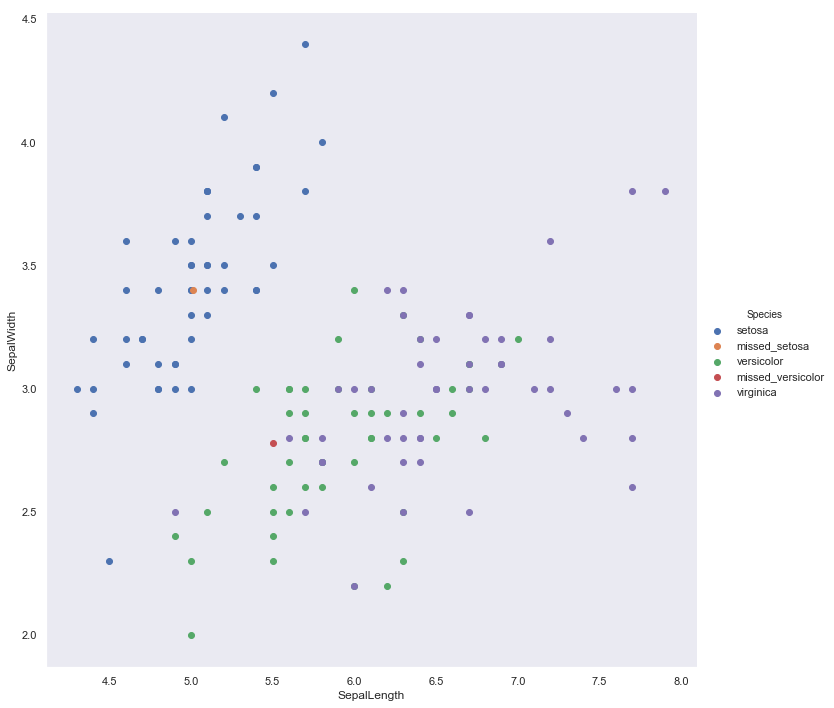

In [105]:
plot = sns.FacetGrid(new_feature_set, hue="Species", size=10).map(plt.scatter, "SepalLength", "SepalWidth").add_legend()
plot.savefig('../reports/figures/scatter_missing_local_mean.png')

In [108]:
new_feature_set.loc[25, 'Species'] = 'setosa'
new_feature_set.loc[82, 'Species'] = 'versicolor'

In [109]:
new_feature_set['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

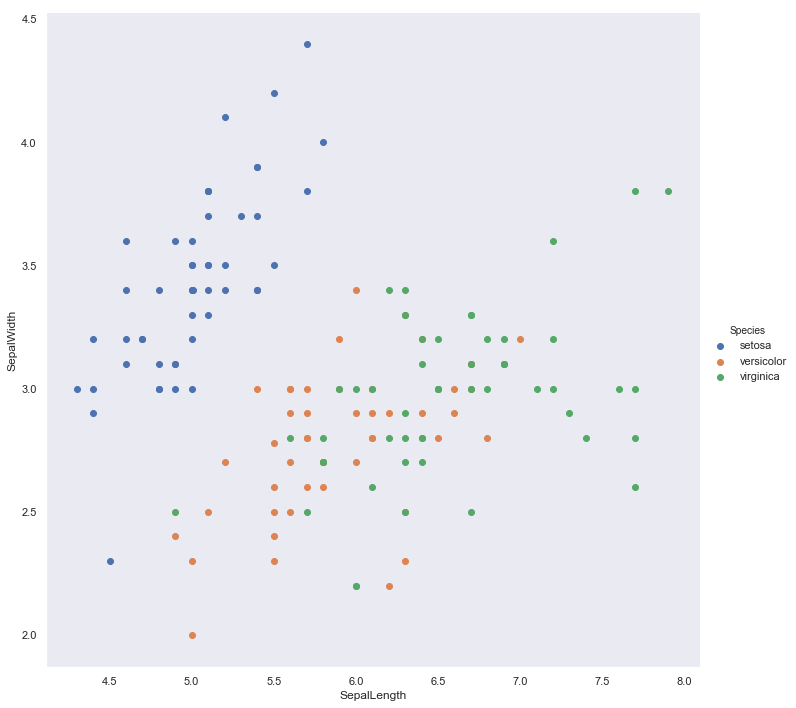

In [110]:
plot = sns.FacetGrid(new_feature_set, hue="Species", size=10).map(plt.scatter, "SepalLength", "SepalWidth").add_legend()
plot.savefig('../reports/figures/scatter_local_mean.png')

<h3> Sepal length:width ratio </h3>

In [111]:
new_feature_set['ratio_sepal'] = new_feature_set['SepalLength']/new_feature_set['SepalWidth']

<h3> Petal length:width ratio </h3>

In [112]:
new_feature_set['ratio_petal'] = new_feature_set['PetalLength']/new_feature_set['PetalWidth']

<h3> Correlation analyse </h3>

In [113]:
new_feature_set.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,ratio_sepal,ratio_petal
1,5.1,3.5,1.4,0.2,setosa,1.457143,7.0
2,4.9,3.0,1.4,0.2,setosa,1.633333,7.0
3,4.7,3.2,1.3,0.2,setosa,1.468750,6.5
4,4.6,3.1,1.5,0.2,setosa,1.483871,7.5
5,5.0,3.6,1.4,0.2,setosa,1.388889,7.0


In [115]:
new_feature_set['SpeciesEncoded'] = le.transform(new_feature_set['Species'])
new_feature_set['SpeciesEncoded'].unique()

array([0, 1, 2], dtype=int64)

In [130]:
new_features = ['ratio_sepal', 'ratio_petal', 'Species']

In [116]:
new_feature_set.corr()['SpeciesEncoded']

SepalLength       0.781994
SepalWidth       -0.429357
PetalLength       0.949035
PetalWidth        0.956547
ratio_sepal       0.779237
ratio_petal      -0.679061
SpeciesEncoded    1.000000
Name: SpeciesEncoded, dtype: float64

In [125]:
if 'SpeciesEncoded' in new_feature_set.columns:
    new_feature_set = new_feature_set.drop(columns=['SpeciesEncoded'])

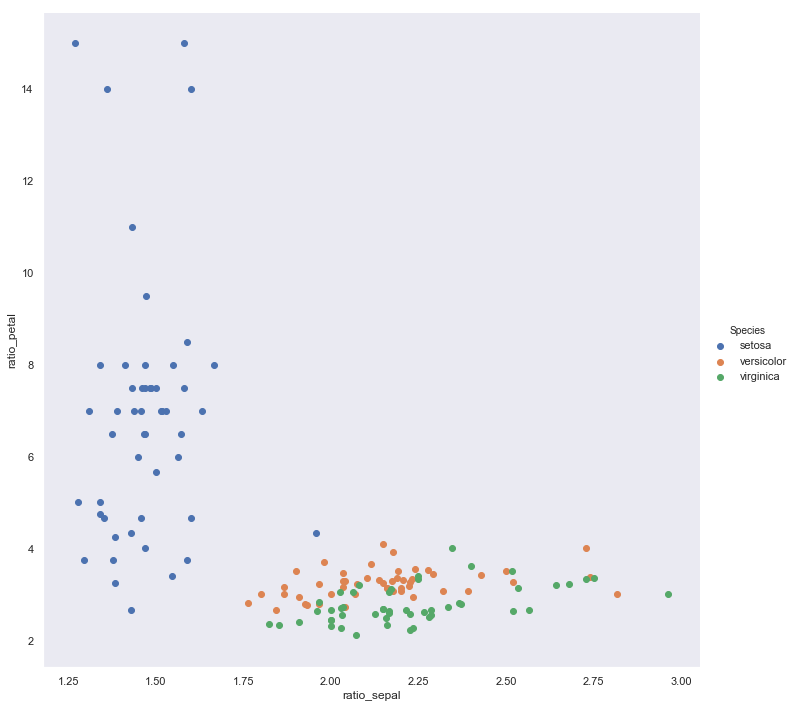

In [133]:
plot = sns.FacetGrid(new_feature_set, hue="Species", size=10).map(plt.scatter, "ratio_sepal", "ratio_petal").add_legend()
plot.savefig('../reports/figures/scatter_ratios.png')

As we can see, ratio_petal do not work very well - we have wide range of values. Looking into X axis - we have ratio_sepal. There is good separation of setosa samples, but stll we have problem with versicolor and virginica.  
In conclusion, we can try using them - only them, all features (including these two new) and using only one at the moment.  
To test their value, we will use only one model, with default parameters - for this test that will be kNN. 

In [134]:
features_list_new = ['ratio_sepal', 'ratio_petal']
features_list_all = ['ratio_sepal', 'ratio_petal', 'SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
features_list_ratio_sepal_only = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'ratio_sepal']
features_list_ratio_petal_only = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'ratio_petal']

In [149]:
train_feature, test_feature = train_test_split(new_feature_set, test_size = 0.3, random_state=seed)

<h3> Basic only - reference to new features </h3>

In [163]:
#new features only test
train_feature_X = train_feature[data_features] # taking the training data features
train_feature_y=train_feature.Species # output of our training data
test_feature_X= test_feature[data_features] # taking test data features
test_feature_y =test_feature.Species   #output value of test data
print(train_feature_X.shape, train_feature_y.shape)

(105, 4) (105,)


In [164]:
knn(train_feature_X, train_feature_y, test_feature_X, test_feature_y, data_set="basic_features_test")

The accuracy is 0.9333333333333333
The precision is [1.         0.9375     0.88235294]
The recall is [1.         0.88235294 0.9375    ]
The F-score is [1.         0.90909091 0.90909091]


Using local mean value give us better accuracy score than using global mean value to fill missing/incorrect values - but this score is still lower than in case that we are dropping rows with missing/incorrect data.

<h3> New features only test </h3>

In [150]:
#new features only test
train_feature_X = train_feature[features_list_new] # taking the training data features
train_feature_y=train_feature.Species # output of our training data
test_feature_X= test_feature[features_list_new] # taking test data features
test_feature_y =test_feature.Species   #output value of test data
print(train_feature_X.shape, train_feature_y.shape)

(105, 2) (105,)


In [151]:
knn(train_feature_X, train_feature_y, test_feature_X, test_feature_y, data_set="ratio_only_test")

The accuracy is 0.8444444444444444
The precision is [0.91666667 0.9375     0.70588235]
The recall is [1.         0.71428571 0.92307692]
The F-score is [0.95652174 0.81081081 0.8       ]


<h3> All features test </h3>

In [152]:
train_feature_X = train_feature[features_list_all] # taking the training data features
train_feature_y=train_feature.Species # output of our training data
test_feature_X= test_feature[features_list_all] # taking test data features
test_feature_y =test_feature.Species   #output value of test data
print(train_feature_X.shape, train_feature_y.shape)

(105, 6) (105,)


In [153]:
knn(train_feature_X, train_feature_y, test_feature_X, test_feature_y, data_set="all_features_test")

The accuracy is 0.9333333333333333
The precision is [1.         0.9375     0.88235294]
The recall is [1.         0.88235294 0.9375    ]
The F-score is [1.         0.90909091 0.90909091]


<h3> Basic + sepal ratio features test </h3>

In [157]:
train_feature_X = train_feature[features_list_ratio_sepal_only] # taking the training data features
train_feature_y=train_feature.Species # output of our training data
test_feature_X= test_feature[features_list_ratio_sepal_only] # taking test data features
test_feature_y =test_feature.Species   #output value of test data
print(train_feature_X.shape, train_feature_y.shape)

(105, 5) (105,)


In [158]:
knn(train_feature_X, train_feature_y, test_feature_X, test_feature_y, data_set="basic_sepal_features_test")

The accuracy is 0.9111111111111111
The precision is [1.         0.9375     0.82352941]
The recall is [1.         0.83333333 0.93333333]
The F-score is [1.         0.88235294 0.875     ]


<h3> Basic + petal ratio features test </h3>

In [159]:
train_feature_X = train_feature[features_list_ratio_petal_only] # taking the training data features
train_feature_y=train_feature.Species # output of our training data
test_feature_X= test_feature[features_list_ratio_petal_only] # taking test data features
test_feature_y =test_feature.Species   #output value of test data
print(train_feature_X.shape, train_feature_y.shape)

(105, 5) (105,)


In [160]:
knn(train_feature_X, train_feature_y, test_feature_X, test_feature_y, data_set="basic_petal_features_test")

The accuracy is 0.9333333333333333
The precision is [1.         0.9375     0.88235294]
The recall is [1.         0.88235294 0.9375    ]
The F-score is [1.         0.90909091 0.90909091]


<h3> Conclusion to new features tests </h3>

As we can see after looking at results, adding these two additional features is not improving the accuracy score - maybe combination of them with only specified basic features will give better result of that. 